In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# pip install vega_datasets

In [3]:
from vega_datasets import local_data

In [4]:
stocks = local_data.stocks()

In [5]:
stocks.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


In [6]:
stocks.set_index(['symbol','date'], inplace=True)

In [7]:
stocks.head()

price
symbol date             
MSFT   2000-01-01  39.81
       2000-02-01  36.35
       2000-03-01  43.22
       2000-04-01  28.37
       2000-05-01  25.45

In [8]:
stocks.loc['MSFT']

,price
date,
2000-01-01,39.81
2000-02-01,36.35
2000-03-01,43.22
2000-04-01,28.37
2000-05-01,25.45
...,...
2009-11-01,29.27
2009-12-01,30.34
2010-01-01,28.05


In [9]:
stocks.loc['MSFT','2008']

,price
date,
2008-01-01,31.13
2008-02-01,26.07
2008-03-01,27.21
2008-04-01,27.34
2008-05-01,27.25
2008-06-01,26.47
2008-07-01,24.75
2008-08-01,26.36
2008-09-01,25.78


In [10]:
stocks_pivot = stocks.unstack()
stocks_pivot

price                                                         \
date   2000-01-01 2000-02-01 2000-03-01 2000-04-01 2000-05-01 2000-06-01   
symbol                                                                     
AAPL        25.94      28.66      33.95      31.01      21.00      26.19   
AMZN        64.56      68.87      67.00      55.19      48.31      36.31   
GOOG          NaN        NaN        NaN        NaN        NaN        NaN   
IBM        100.52      92.11     106.11      99.95      96.31      98.33   
MSFT        39.81      36.35      43.22      28.37      25.45      32.54   

                                                    ...                        \
date   2000-07-01 2000-08-01 2000-09-01 2000-10-01  ... 2009-06-01 2009-07-01   
symbol                                              ...                         
AAPL        25.41      30.47      12.88       9.78  ...     142.43     163.39   
AMZN        30.12      41.50      38.44      36.62  ...      83.66      85.76   
GOOG          NaN        NaN        NaN        NaN  ...     421.59     443.05   
IBM        100.74     118.62     101.19      88.50  ...     103.01     116.34   
MSFT        28.40      28.40      24.53      28.02  ...      23.42      23.18   

                                                                          \
date   2009-08-01 2009-09-01 2009-10-01 2009-11-01 2009-12-01 2010-01-01   
symbol                                                                     
AAPL       168.21     185.35     188.50     199.91     210.73     192.06   
AMZN        81.19      93.36     118.81     135.91     134.52     125.41   
GOOG       461.67     495.85     536.12     583.00     619.98     529.94   
IBM        117.00     118.55     119.54     125.79     130.32     121.85   
MSFT        24.43      25.49      27.48      29.27      30.34      28.05   

                              
date   2010-02-01 2010-03-01  
symbol                        
AAPL       204.62     223.02  
AMZN       118.40     128.82  
GOOG       526.80     560.19  
IBM        127.16     125.55  
MSFT        28.67      28.80  

[5 rows x 123 columns]

In [50]:
stocks_unpivot = stocks_pivot.stack()
stocks_unpivot

price
symbol date             
AAPL   2000-01-01  25.94
       2000-02-01  28.66
       2000-03-01  33.95
       2000-04-01  31.01
       2000-05-01  21.00
...                  ...
MSFT   2009-11-01  29.27
       2009-12-01  30.34
       2010-01-01  28.05
       2010-02-01  28.67
       2010-03-01  28.80

[560 rows x 1 columns]

In [ ]:
stocks_unpivot.reset_index(inplace=True)
stocks_unpivot

In [ ]:
# Date Time
seattle = local_data.seattle_weather()
seattle.head()

In [ ]:
date = pd.to_datetime('17 jun 2024 11:15 AM')
date

In [ ]:
date.hour

In [ ]:
date.minute

In [ ]:
date = pd.to_datetime('17 jun 2024 11:15 AM').tz_localize('US/Pacific')
date

In [ ]:
seattle.dtypes

In [ ]:
seattle['date'].dt.day

In [ ]:
seattle['month'] = seattle['date'].dt.month
seattle['month']

In [ ]:
seattle['month_name'] = seattle['date'].dt.month_name()
seattle['month_name']

In [ ]:
seattle['date'].max()

In [ ]:
seattle['date'].dt.to_period('M')

In [ ]:
seattle['date'].dt.to_period('M').max()

In [ ]:
seattle['date'].max() - seattle['date'].min()

In [ ]:
seattle.groupby(['month','month_name']).mean()[['precipitation']]

In [ ]:
monthly_precip = seattle.groupby(['month','month_name']).mean()[['precipitation']].reset_index()
monthly_precip

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x='month_name', y='precipitation', data=monthly_precip)

plt.xlabel('month')
plt.ylabel('Average precipitation (inches)')
plt.title('Average precipitation by month')

In [ ]:
# Resampling Data
seattle.set_index(['date'], inplace=True)
seattle

In [ ]:
seattle['temp_min'].resample('H').ffill()

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x=seattle.index, y='precipitation', data=seattle)

In [ ]:
biweekly_precip = seattle['precipitation'].resample('2W').mean()

In [ ]:
biweekly_precip

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x=biweekly_precip.index, y=biweekly_precip.values, data=biweekly_precip)

In [ ]:
low_temps_monthly = seattle['temp_min'].resample('M').min()
low_temps_monthly.head()

In [ ]:
seattle['temp_max'].resample('MS').first().head()

In [ ]:
seattle['temp_max'].resample('MS').last().head()

In [ ]:
# Window Function
seattle['precip_lag'] = seattle['precipitation'].shift(1)
seattle.head()

In [ ]:
seattle['precip_lead'] = seattle['precipitation'].shift(-2)
seattle.head()

In [ ]:
seattle.count()

In [ ]:
seattle.dropna(inplace=True)

In [ ]:
seattle['precip_rolling_avg'] = seattle['precipitation'].rolling(7).mean()
seattle.head(14)

In [ ]:
seattle['precip_rolling_sum'] = seattle['precipitation'].rolling(7).sum()
seattle.head(14)

In [ ]:
seattle['precip_change'] = seattle['precipitation'].pct_change(1)
seattle.head(14)

In [ ]:
sns.lineplot(x='date', y='precip_change', data=seattle)

In [ ]:
sns.lineplot(x='date',y='precip_rolling_avg', data=seattle)

In [11]:
# Missing Values - Missingno Package

import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
# pip install missingno

In [14]:
import missingno as mn

In [15]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [16]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [17]:
penguins.replace(9, np.NaN)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [18]:
penguins.isnull().sum()/len(penguins)

species              0.000000
island               0.000000
bill_length_mm       0.005814
bill_depth_mm        0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.031977
dtype: float64

<AxesSubplot: >

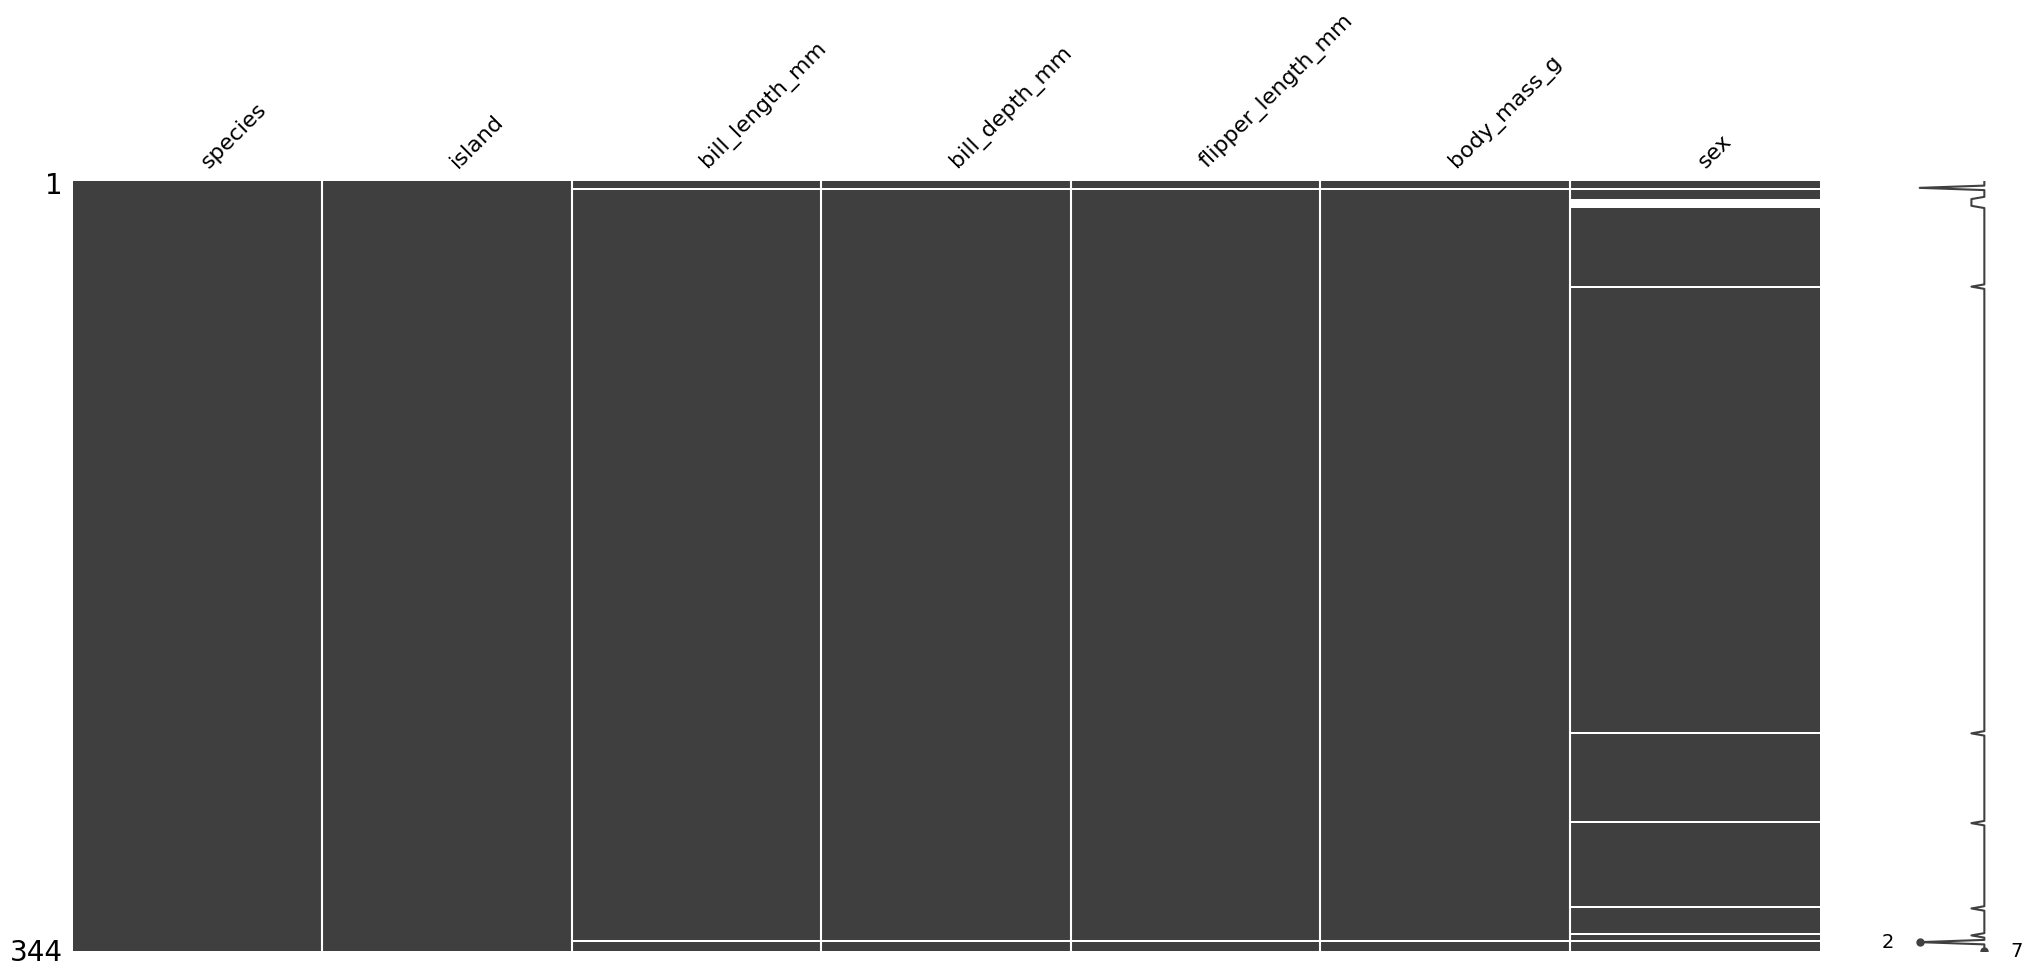

In [19]:
mn.matrix(penguins)

In [20]:
penguins_drop = penguins.dropna()
penguins_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [21]:
penguins['sex'].fillna(penguins['sex'].mode()[0])

0        Male
1      Female
2      Female
3        Male
4      Female
        ...  
339      Male
340    Female
341      Male
342    Female
343      Male
Name: sex, Length: 344, dtype: object

In [23]:
penguins['body_mass_g_impute'] = penguins['body_mass_g'].fillna(penguins['body_mass_g'].median())
penguins[['body_mass_g', 'body_mass_g_impute']].describe()

,body_mass_g,body_mass_g_impute
count,342.000000,344.000000
mean,4201.754386,4200.872093
std,801.954536,799.696532
min,2700.000000,2700.000000
25%,3550.000000,3550.000000
50%,4050.000000,4050.000000
75%,4750.000000,4750.000000
max,6300.000000,6300.000000


In [24]:
# Recoding Variables - map and replace

mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [26]:
mapping = {'usa': 'United Sates', 'europe': 'Europe'}
mpg['origin_map'] = mpg['origin'].map(mapping)
#mpg.head()
mpg['origin_map'].unique()

array(['United Sates', nan, 'Europe'], dtype=object)

In [27]:
mpg['origin_replace'] = mpg['origin'].replace(mapping)
mpg['origin_replace'].unique()

array(['United Sates', 'japan', 'Europe'], dtype=object)

In [29]:
# To put US and rest as other
mapping = {'usa': 'United States'}
mpg['origin_other'] = mpg['origin'].map(mapping)
mpg['origin_other'].replace(np.NaN, 'Other', inplace=True)

mpg['origin_other'].unique()

array(['United States', 'Other'], dtype=object)

In [39]:
# Regular Expression - Bash Shell
hof = pd.read_csv('/Users/mymac/Documents/Data Science Bootcamp/Week 10 - Data Profiling/hof_inducted.csv')
hof

,player_id,yearid,votedby,ballots,needed,votes,inducted,category
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player
...,...,...,...,...,...,...,...,...
307,martipe02,2015,BBWAA,549.0,412.0,500.0,Y,Player
308,smoltjo01,2015,BBWAA,549.0,412.0,455.0,Y,Player
309,biggicr01,2015,BBWAA,549.0,412.0,454.0,Y,Player
310,griffke02,2016,BBWAA,440.0,330.0,437.0,Y,Player


In [38]:
hof_1936 = hof.query('yearid == 1936')
hof_1936

,player_id,yearid,votedby,ballots,needed,votes,inducted,category
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player


In [35]:
vcv = '[^AEIOU][^AEIOU][^AEIOU][AEIOU][AEIOU]'

In [37]:
hof_1936['votedby'].str.count(vcv).sum()

5

In [41]:
hof_1936['vcv'] = hof_1936['votedby'].str.contains(vcv)
hof_1936.head()

,player_id,yearid,votedby,ballots,needed,votes,inducted,category,vcv
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,True
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,True
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,True
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,True
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,True


In [42]:
hof_1936['vcv'].sum()

5

In [44]:
heroes_info = pd.read_csv('/Users/mymac/Documents/Data Science Bootcamp/Week 10 - Data Profiling/heroes_information.csv')
heroes_info.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [45]:
# Find the heroes whose first name ends with 'n', \s for whitespace and \w for any word or words
first_word_n = '[a-zA-Z]+[n]\s\w'

In [47]:
heroes_info['name'].str.count(first_word_n).sum()

79

In [49]:
heroes_info[heroes_info['name'].str.match(first_word_n)]

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
13,13,Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0
18,18,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0
70,70,Batman II,Male,blue,Human,Black,178.0,DC Comics,-,good,79.0
72,72,Batwoman V,Female,green,Human,Red,178.0,DC Comics,-,good,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
602,602,Simon Baz,Male,bown,Human,Black,-99.0,DC Comics,-,good,-99.0
605,605,Siren II,Female,black,-,-,-99.0,DC Comics,-,bad,-99.0
611,611,Solomon Grundy,Male,black,Zombie,White,279.0,DC Comics,-,bad,437.0
700,700,Vision II,-,red,-,No Hair,191.0,Marvel Comics,-,good,135.0
